# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [14]:
import pandas as pd
csv_file_path = '2019_Yellow_Taxi_Trip_Data.csv'
df = pd.read_csv(csv_file_path)
df.head(5)

vendorid     tpep_pickup_datetime    tpep_dropoff_datetime  \
0         2  2019-10-23T16:39:42.000  2019-10-23T17:14:10.000   
1         1  2019-10-23T16:32:08.000  2019-10-23T16:45:26.000   
2         2  2019-10-23T16:08:44.000  2019-10-23T16:21:11.000   
3         2  2019-10-23T16:22:44.000  2019-10-23T16:43:26.000   
4         2  2019-10-23T16:45:11.000  2019-10-23T16:58:49.000   

   passenger_count  trip_distance  ratecodeid store_and_fwd_flag  \
0                1           7.93           1                  N   
1                1           2.00           1                  N   
2                1           1.36           1                  N   
3                1           1.00           1                  N   
4                1           1.96           1                  N   

   pulocationid  dolocationid  payment_type  fare_amount  extra  mta_tax  \
0           138           170             1         29.5    1.0      0.5   
1            11            26             1         10.5    1.0      0.5   
2           163           162             1          9.5    1.0      0.5   
3           170           163             1         13.0    1.0      0.5   
4           163           236             1         10.5    1.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        7.98          6.12                    0.3         47.90   
1        0.00          0.00                    0.3         12.30   
2        2.00          0.00                    0.3         15.80   
3        4.32          0.00                    0.3         21.62   
4        0.50          0.00                    0.3         15.30   

   congestion_surcharge  
0                   2.5  
1                   0.0  
2                   2.5  
3                   2.5  
4                   2.5

#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [3]:
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 10000
Number of Columns: 18


#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [4]:
summary_stats = df[["fare_amount", "tip_amount", "tolls_amount", "total_amount"]].describe()
print(summary_stats)

        fare_amount    tip_amount  tolls_amount  total_amount
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      15.106313      2.634494      0.623447     22.564659
std       13.954762      3.409800      6.437507     19.209255
min      -52.000000      0.000000     -6.120000    -65.920000
25%        7.000000      0.000000      0.000000     12.375000
50%       10.000000      2.000000      0.000000     16.300000
75%       16.000000      3.250000      0.000000     22.880000
max      176.000000     43.000000    612.000000    671.800000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [5]:
max_distance_index = df['trip_distance'].idxmax()
longest_trip_data = df.loc[max_distance_index, ["fare_amount", "tip_amount", "tolls_amount", "total_amount"]]
print("Isolated values for the longest trip by distance:")
print(longest_trip_data)

Isolated values for the longest trip by distance:
fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object


---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [6]:
csv_file_path = 'Meteorite_Landings.csv'
meteorite_df = pd.read_csv(csv_file_path)
meteorite_df = meteorite_df.rename(columns={'mass (g)': 'mass'})
meteorite_df = meteorite_df.drop(['reclat', 'reclong'], axis=1)
meteorite_df = meteorite_df.sort_values(by='mass', ascending=False)
meteorite_df.head()

name     id nametype      recclass        mass   fall  \
16392             Hoba  11890    Valid     Iron, IVB  60000000.0  Found   
5373         Cape York   5262    Valid   Iron, IIIAB  58200000.0  Found   
5365   Campo del Cielo   5247    Valid  Iron, IAB-MG  50000000.0  Found   
5370     Canyon Diablo   5257    Valid  Iron, IAB-MG  30000000.0  Found   
3455           Armanty   2335    Valid    Iron, IIIE  28000000.0  Found   

                         year             GeoLocation  
16392  01/01/1920 12:00:00 AM   (-19.58333, 17.91667)  
5373   01/01/1818 12:00:00 AM   (76.13333, -64.93333)  
5365   12/22/1575 12:00:00 AM  (-27.46667, -60.58333)  
5370   01/01/1891 12:00:00 AM     (35.05, -111.03333)  
3455   01/01/1898 12:00:00 AM            (47.0, 88.0)

#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [21]:
csv_file_path = 'Meteorite_Landings.csv'
meteorite_df = pd.read_csv(csv_file_path)
meteorite_df['year'] = pd.to_numeric(
    pd.to_datetime(meteorite_df['year'], format="%m%d%Y %I:%M:%S %p", errors='coerce').dt.year, errors='coerce'
)

meteorite_df['fall_before_1970'] = meteorite_df['year'] < 1970
meteorite_df.set_index('id', inplace=True)
meteorite_df.sort_index(inplace=True)
selected_rows = meteorite_df.loc[10036:10040]
print(selected_rows.to_string())

            name nametype         recclass  mass (g)   fall  year    reclat    reclong            GeoLocation  fall_before_1970
id                                                                                                                             
10036     Enigma    Valid               H4      94.0  Found   NaN  31.33333  -82.31667  (31.33333, -82.31667)             False
10037       Enon    Valid  Iron, ungrouped     763.0  Found   NaN  39.86667  -83.95000     (39.86667, -83.95)             False
10038      Enshi    Valid               H5    8000.0   Fell   NaN  30.30000  109.50000          (30.3, 109.5)             False
10039  Ensisheim    Valid              LL6  127000.0   Fell   NaN  47.86667    7.35000       (47.86667, 7.35)             False


#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [8]:
meteorite_df = pd.read_csv('Meteorite_Landings.csv')
meteorite_df['year'] = pd.to_numeric(
    pd.to_datetime(meteorite_df['year'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce').dt.year, errors='coerce'
)
filtered_data = meteorite_df[(meteorite_df['year'] >= 2005) & (meteorite_df['year'] <= 2009)]
pivot_table = pd.pivot_table(
    filtered_data,
    values=['name', 'mass (g)'],
    index='year',
    columns='fall',
    aggfunc={'name': 'count', 'mass (g)': lambda x: x.quantile(0.95)}
)

pivot_table.columns = ['found_count', 'fall_count', 'found_mass_95th_percentile', 'fall_mass_95th_percentile']
print(pivot_table)

        found_count  fall_count  found_mass_95th_percentile  \
year                                                          
2005.0          NaN     4500.00                         NaN   
2006.0      25008.0     1600.50                         5.0   
2007.0      89675.0     1126.90                         8.0   
2008.0     106000.0     2274.80                         9.0   
2009.0       8333.4     1397.25                         5.0   

        fall_mass_95th_percentile  
year                               
2005.0                      875.0  
2006.0                     2451.0  
2007.0                     1181.0  
2008.0                      948.0  
2009.0                     1492.0  


#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [9]:
meteorite_df = pd.read_csv('Meteorite_Landings.csv')
summary_stats = meteorite_df.groupby('fall')['mass (g)'].describe()
print(summary_stats)

         count          mean            std  min     25%     50%      75%  \
fall                                                                        
Fell    1075.0  47070.715023  717067.125826  0.1  686.00  2800.0  10450.0   
Found  44510.0  12461.922983  571105.752311  0.0    6.94    30.5    178.0   

              max  
fall               
Fell   23000000.0  
Found  60000000.0  


#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [10]:
taxi_data = pd.read_csv('2019_Yellow_Taxi_Trip_Data.csv')
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])
taxi_data.set_index('tpep_dropoff_datetime', inplace=True)
hourly_data = taxi_data.resample('H').agg({
    'trip_distance': 'sum',
    'fare_amount': 'sum',
    'tolls_amount': 'sum',
    'tip_amount': 'sum'
})
top_hours = hourly_data.nlargest(5, 'tip_amount')
print(top_hours)

                       trip_distance  fare_amount  tolls_amount  tip_amount
tpep_dropoff_datetime                                                      
2019-10-23 16:00:00         10676.95     67797.76        699.04    12228.64
2019-10-23 17:00:00         16052.83     70131.91       4044.04    12044.03
2019-10-23 18:00:00          3104.56     11565.56       1454.67     1907.64
2019-10-23 15:00:00            14.34       213.50          0.00       51.75
2019-10-23 19:00:00            98.59       268.00         24.48       25.74


--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

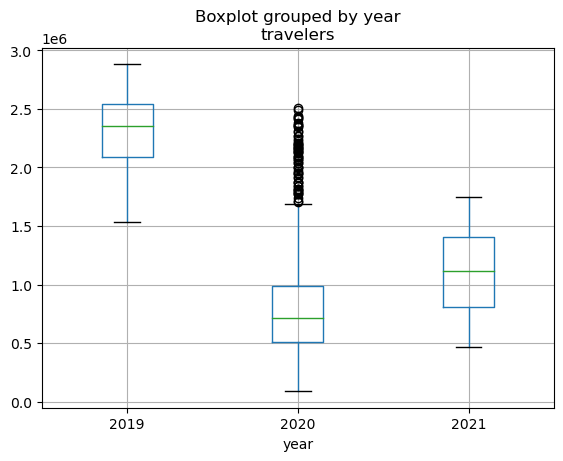

In [16]:
import matplotlib.pyplot as plt
file_path = 'tsa_melted_holiday_travel.csv' 
df = pd.read_csv(file_path)
df.boxplot(column='travelers', by='year')

plt.show()

#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

In [17]:
df['date'] = pd.to_datetime(df['date'])
df_2019 = df[df['date'].dt.year == 2019].copy() #copy(), so we dont get a warning here
df_2019['day'] = df_2019['date'].dt.day_name()
df_2019['month'] = df_2019['date'].dt.month_name()
pivot_table = df_2019.pivot_table(values='travelers', index='day', columns='month', aggfunc='median')
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table.reindex(columns=months_order)
pivot_table.style.background_gradient()

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.

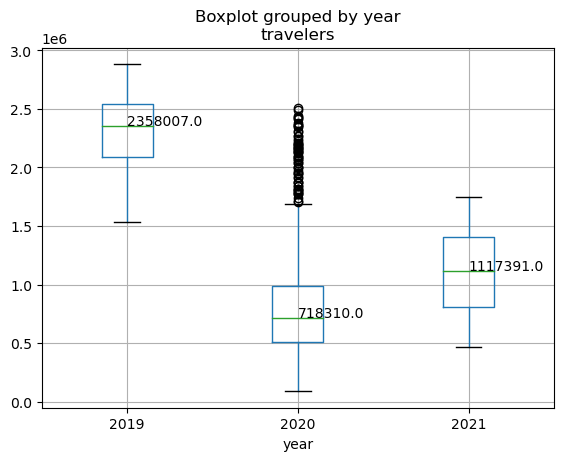

In [18]:
boxplot = df.boxplot(column='travelers', by='year')
medians = df.groupby('year')['travelers'].median()
x_positions = [i + 1 for i in range(len(df['year'].unique()))]

for x, median in zip(x_positions, medians):
    label = boxplot.get_xticklabels()[x - 1]
    boxplot.annotate(str(median), xy=(x, median))

plt.show()